### Loading and plotting some real _C. elegans_ datasets.
---
*Last updated: 11 July 2023*

We have obtained "whole brain" calcium imaging data from a few open source datasets. 


|Paper Link             |Database Link     |Files w/ Data          |Num. ID'd| 
|-----------------------|------------------|-----------------------|---------|
|tinyurl.com/Flavell2023|wormwideweb.org   |`YYYY-MM-DD-*.json/h5` |89/136   |
|tinyurl.com/Leifer2023 |osf.io/e2syt/     |`exported_data.tar.gz` |69/122   |
|tinyurl.com/Uzel2022   |osf.io/3vkxn/     |`Uzel_WT.mat`          |50/138   |
|tinyurl.com/Kaplan20   |osf.io/9nfhz/     |`Neuron2019_Data_*.mat`|36/114   |
|tinyurl.com/Skora2018  |osf.io/za3gt/     |`WT_*.mat`             |46/129   |
|tinyurl.com/Nichols2017|osf.io/kbf38/     |`*let.mat`             |34/108   |
|tinyurl.com/Kato2015   |osf.io/2395t/     |`WT_*Stim.mat`         |42/127   |


### What's the distinction between "whole-brain" and "whole-nervous system" recordings? 

The nervous system of the _C. elegans_ hermaphrodite is composed of 302 neurons that are organized in several 
ganglia in the head and tail and into a spinal cord-like ventral nerve cord [1]. The majority of the neurons 
is located in the head, where they are organised in a number of ganglia surrounding the pharynx, forming the 
brain of the animal [2].

References:
- [1] http://www.wormbook.org/chapters/www_specnervsys.2/neurogenesis.html<br>
- [2] https://www.sfu.ca/biology/faculty/hutter/hutterlab/research/Ce_nervous_system.html<br>

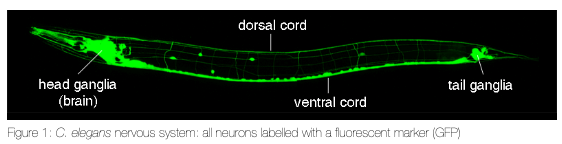

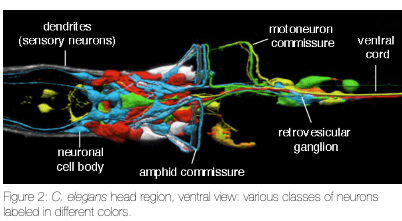

In [5]:
import numpy as np
from data._utils import pick_worm, load_dataset
from visualize._utils import plot_worm_data

['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11']
Num. ID'd : 43/107
Num. ID'd : 44/122
Num. ID'd : 37/124
Num. ID'd : 51/134
Num. ID'd : 45/121
Num. ID'd : 44/151
Num. ID'd : 51/146
Num. ID'd : 38/109
Num. ID'd : 44/135
Num. ID'd : 32/131
Num. ID'd : 47/125
Num. ID'd : 31/129
Avg Num. ID'd : 42/127


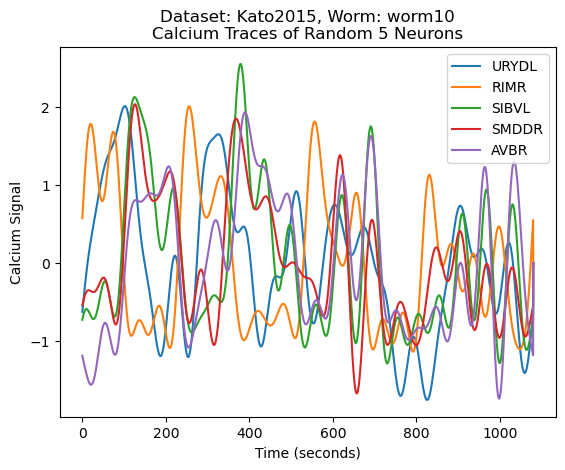

In [6]:
# @title Kato et al., Cell 2015, _Global Brain Dynamics Embed the Motor Command Sequence of Caenorhabditis elegans_
# @markdown Source: https://osf.io/2395t/

# load the dataset
Kato2015 = load_dataset("Kato2015")
print(list(Kato2015.keys()))

# number of ID'd neurons versus number of neurons measured
total_avg, named_avg = 0, 0
for worm in list(Kato2015.keys()):
    single_worm_dataset = pick_worm(Kato2015, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    print(f"Num. ID'd : {named_neurons}/{total_neurons}")
    total_avg += total_neurons / len(Kato2015)
    named_avg += named_neurons / len(Kato2015)
print(f"Avg Num. ID'd : {int(named_avg)}/{int(total_avg)}")

# get data for one worm
worm = np.random.choice(list(Kato2015.keys()))
single_worm_dataset = pick_worm(Kato2015, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)

['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43']
Num. ID'd : 23/117
Num. ID'd : 36/130
Num. ID'd : 35/121
Num. ID'd : 35/119
Num. ID'd : 33/104
Num. ID'd : 25/120
Num. ID'd : 34/122
Num. ID'd : 35/116
Num. ID'd : 39/112
Num. ID'd : 30/106
Num. ID'd : 29/127
Num. ID'd : 36/104
Num. ID'd : 35/116
Num. ID'd : 38/111
Num. ID'd : 30/106
Num. ID'd : 39/115
Num. ID'd : 35/100
Num. ID'd : 27/102
Num. ID'd : 34/102
Num. ID'd : 33/87
Num. ID'd : 33/82
Num. ID'd : 39/104
Num. ID'd : 32/82
Num. ID'd : 35/100
Num. ID'd : 43/126
Num. ID'd : 28/99
Num. ID'd : 43/113
Num. ID'd : 42/114
Num. ID'd : 42/111
Num. ID'd : 37/103
Num

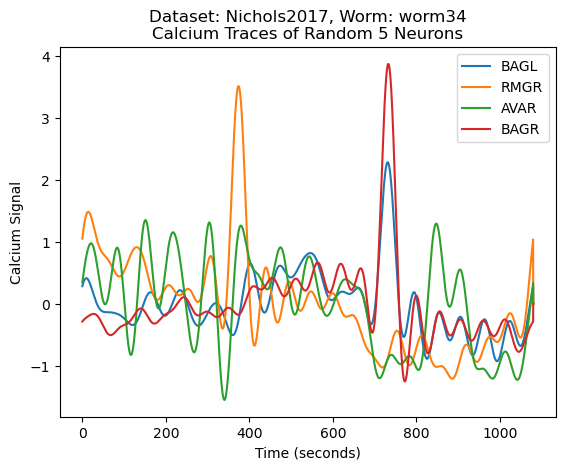

In [7]:
# @title Nichols et al., Science 2017, _A global brain state underlies C. elegans sleep behavior_
# @markdown Source: https://osf.io/kbf38/

# load the dataset
Nichols2017 = load_dataset("Nichols2017")
print(list(Nichols2017.keys()))

# number of ID'd neurons versus number of neurons measured
total_avg, named_avg = 0, 0
for worm in list(Nichols2017.keys()):
    single_worm_dataset = pick_worm(Nichols2017, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    print(f"Num. ID'd : {named_neurons}/{total_neurons}")
    total_avg += total_neurons / len(Nichols2017)
    named_avg += named_neurons / len(Nichols2017)
print(f"Avg Num. ID'd : {int(named_avg)}/{int(total_avg)}")

# get data for one worm
worm = np.random.choice(list(Nichols2017.keys()))
single_worm_dataset = pick_worm(Nichols2017, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)

dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11'])
Num. ID'd : 40/139
Num. ID'd : 51/143
Num. ID'd : 55/131
Num. ID'd : 48/114
Num. ID'd : 45/123
Num. ID'd : 42/127
Num. ID'd : 48/128
Num. ID'd : 52/147
Num. ID'd : 45/127
Num. ID'd : 39/125
Num. ID'd : 47/126
Num. ID'd : 49/123
Avg Num. ID'd : 46/129


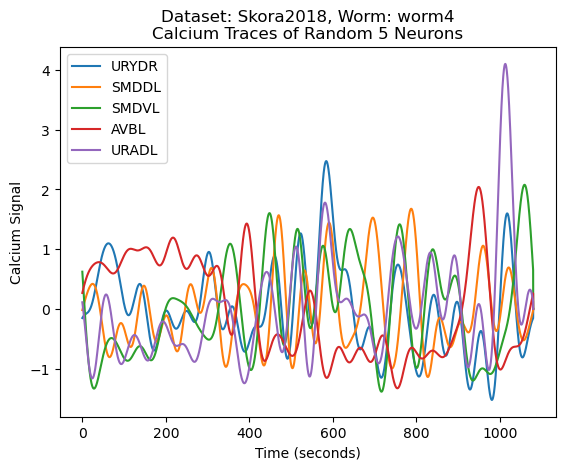

In [8]:
# @title Skora et al., Cell Reports 2018, _Energy Scarcity Promotes a Brain-wide Sleep State Modulated by Insulin Signaling in C. elegans_
# @markdown Source: https://osf.io/za3gt/

# # load the dataset
Skora2018 = load_dataset("Skora2018")
print(Skora2018.keys())

# number of ID'd neurons versus number of neurons measured
total_avg, named_avg = 0, 0
for worm in list(Skora2018.keys()):
    single_worm_dataset = pick_worm(Skora2018, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    print(f"Num. ID'd : {named_neurons}/{total_neurons}")
    total_avg += total_neurons / len(Skora2018)
    named_avg += named_neurons / len(Skora2018)
print(f"Avg Num. ID'd : {int(named_avg)}/{int(total_avg)}")

# get data for one worm
worm = np.random.choice(list(Skora2018.keys()))
single_worm_dataset = pick_worm(Skora2018, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)

dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18'])
Num. ID'd : 28/102
Num. ID'd : 29/99
Num. ID'd : 28/107
Num. ID'd : 26/97
Num. ID'd : 43/103
Num. ID'd : 51/129
Num. ID'd : 46/122
Num. ID'd : 51/119
Num. ID'd : 51/124
Num. ID'd : 40/111
Num. ID'd : 37/128
Num. ID'd : 48/127
Num. ID'd : 45/129
Num. ID'd : 44/124
Num. ID'd : 25/105
Num. ID'd : 30/114
Num. ID'd : 27/123
Num. ID'd : 28/97
Num. ID'd : 23/117
Avg Num. ID'd : 36/114


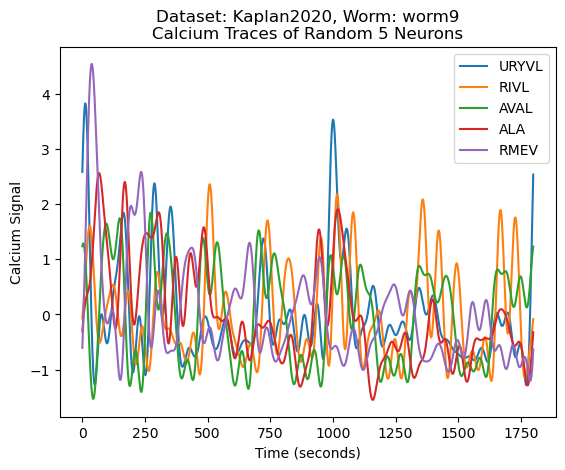

In [9]:
# @title Kaplan et al., Neuron 2020, _Nested Neuronal Dynamics Orchestrate a Behavioral Hierarchy across Timescales_
# @markdown Source: https://osf.io/9nfhz/

# load the dataset
Kaplan2020 = load_dataset("Kaplan2020")
print(Kaplan2020.keys())

# number of ID'd neurons versus number of neurons measured
total_avg, named_avg = 0, 0
for worm in list(Kaplan2020.keys()):
    single_worm_dataset = pick_worm(Kaplan2020, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    print(f"Num. ID'd : {named_neurons}/{total_neurons}")
    total_avg += total_neurons / len(Kaplan2020)
    named_avg += named_neurons / len(Kaplan2020)
print(f"Avg Num. ID'd : {int(named_avg)}/{int(total_avg)}")

# get data for one worm
worm = np.random.choice(list(Kaplan2020.keys()))
single_worm_dataset = pick_worm(Kaplan2020, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)

dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5'])
Num. ID'd : 58/154
Num. ID'd : 54/154
Num. ID'd : 48/133
Num. ID'd : 46/124
Num. ID'd : 49/134
Num. ID'd : 47/133
Avg Num. ID'd : 50/138


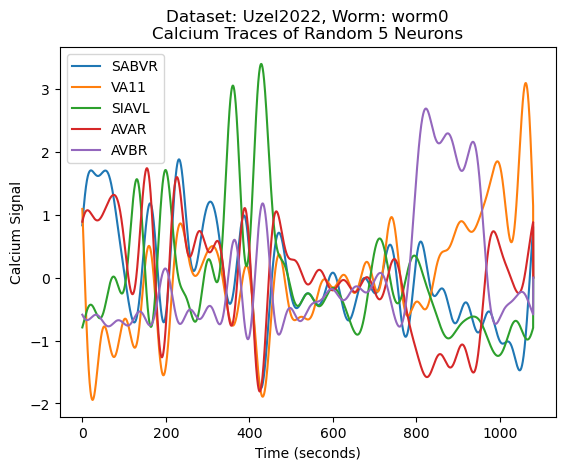

In [10]:
# @title Uzel et al., Cell CurrBio 2022, _A set of hub neurons and non-local connectivity features support global brain dynamics in C. elegans_
# @markdown Source: https://osf.io/3vkxn/

# # load the dataset
Uzel2022 = load_dataset("Uzel2022")
print(Uzel2022.keys())

# number of ID'd neurons versus number of neurons measured
total_avg, named_avg = 0, 0
for worm in list(Uzel2022.keys()):
    single_worm_dataset = pick_worm(Uzel2022, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    print(f"Num. ID'd : {named_neurons}/{total_neurons}")
    total_avg += total_neurons / len(Uzel2022)
    named_avg += named_neurons / len(Uzel2022)
print(f"Avg Num. ID'd : {int(named_avg)}/{int(total_avg)}")

# get data for one worm
worm = np.random.choice(list(Uzel2022.keys()))
single_worm_dataset = pick_worm(Uzel2022, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)

In [11]:
# @title Randi et al., arXiv 2023, _Neural signal propagation atlas of C. elegans_
# @markdown Source: https://osf.io/e2syt/

# # load the dataset
Leifer2023 = load_dataset("Leifer2023")
print(Leifer2023.keys())

# number of ID'd neurons versus number of neurons measured
total_avg, named_avg = 0, 0
for worm in list(Leifer2023.keys()):
    single_worm_dataset = pick_worm(Leifer2023, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    print(f"Num. ID'd : {named_neurons}/{total_neurons}")
    total_avg += total_neurons / len(Leifer2023)
    named_avg += named_neurons / len(Leifer2023)
print(f"Avg Num. ID'd : {int(named_avg)}/{int(total_avg)}")

# get data for one worm
worm = np.random.choice(list(Leifer2023.keys()))
single_worm_dataset = pick_worm(Leifer2023, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)

dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43', 'worm44', 'worm45', 'worm46', 'worm47', 'worm48', 'worm49'])
Num. ID'd : 79/109
Num. ID'd : 81/109
Num. ID'd : 89/130
Num. ID'd : 89/130
Num. ID'd : 98/134
Num. ID'd : 100/134
Num. ID'd : 78/142
Num. ID'd : 81/142
Num. ID'd : 86/142
Num. ID'd : 89/142
Num. ID'd : 71/128
Num. ID'd : 73/128
Num. ID'd : 94/132
Num. ID'd : 98/132
Num. ID'd : 97/144
Num. ID'd : 102/144
Num. ID'd : 71/133
Num. ID'd : 73/133
Num. ID'd : 115/152
Num. ID'd : 116/152
Num. ID'd : 67/126
Num. ID'd : 90/138
Num. ID'd : 89/122
Num. ID'd : 78/130
Num. ID'd : 89/125
Num. ID'd : 78/121


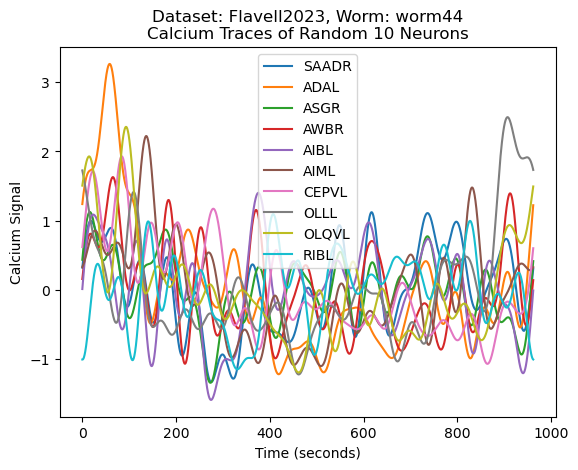

In [ ]:
# @title Atanas, Kim et al., bioRxiv 2022, _Brain-wide representations of behavior spanning multiple timescales and states in C. elegans_
# @markdown Source: wormwideweb.org

# # load the dataset
Flavell2023 = load_dataset("Flavell2023")
print(Flavell2023.keys())

# number of ID'd neurons versus number of neurons measured
total_avg, named_avg = 0, 0
for worm in list(Flavell2023.keys()):
    single_worm_dataset = pick_worm(Flavell2023, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    print(f"Num. ID'd : {named_neurons}/{total_neurons}")
    total_avg += total_neurons / len(Flavell2023)
    named_avg += named_neurons / len(Flavell2023)
print(f"Avg Num. ID'd : {int(named_avg)}/{int(total_avg)}")

# get data for one worm
worm = np.random.choice(list(Flavell2023.keys()))
single_worm_dataset = pick_worm(Flavell2023, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)